# ANOVA

This notebook shows several examples of one-way and two-way ANOVAs using Pingouin.

***


## One-way ANOVA

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. In Pingouin, the one-way ANOVA is implemented in the [anova](https://pingouin-stats.org/generated/pingouin.anova.html#pingouin.anova) function. The ANOVA test has three main assumptions that must be satisfied to provide accurate results:

1. The samples must be independent (i.e. by opposition with repeated measurements in a single group, in which case one should use repeated measures ANOVA [(rm_anova)](https://pingouin-stats.org/generated/pingouin.rm_anova.html#pingouin.rm_anova).
2. Each sample should be normally distributed.
3. The variance of the samples are all equal (= homoscedasticity).

*Note that assumptions #2 and #3 can be checked using the [normality](https://pingouin-stats.org/generated/pingouin.normality.html#pingouin.normality) and [homoscedasticity](https://pingouin-stats.org/generated/pingouin.homoscedasticity.html#pingouin.homoscedasticity) functions.*

### Load data

For this first example, we are going to load the McClave (1991) dataset which compares the pain threshold of subjects as a function of their hair color.

In [3]:
!pip install pingouin

     |████████████████████████████████| 225kB 7.2MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.8-cp36-none-any.whl size=221688 sha256=6be5fa613115ebe9c9d028b6b211ac4a1b94167b0d1307264d98fa43afca3d64
  Stored in directory: /root/.cache/pip/wheels/d6/9e/53/f885f73f29cf7c8cac3d8f4b1532bbfef2f5eb543946ac9055
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4961 sha256=92d07b4066741385f99c3d1ff9adecb953123a750d509d755a7cc4e26f580c00
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7051 sha256=db7d919f496107438c2ab8e9fa62d9f0c3f521517a2f31caec11005562409531
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


In [4]:
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt

# Set the default Pandas float precision to 3 decimals
pd.set_option("display.precision", 3)

df = pg.read_dataset('anova')
df


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Subject      Hair color  Pain threshold
0         1     Light Blond              62
1         2     Light Blond              60
2         3     Light Blond              71
3         4     Light Blond              55
4         5     Light Blond              48
5         6      Dark Blond              63
6         7      Dark Blond              57
7         8      Dark Blond              52
8         9      Dark Blond              41
9        10      Dark Blond              43
10       11  Light Brunette              42
11       12  Light Brunette              50
12       13  Light Brunette              41
13       14  Light Brunette              37
14       15   Dark Brunette              32
15       16   Dark Brunette              39
16       17   Dark Brunette              51
17       18   Dark Brunette              30
18       19   Dark Brunette              35

In [5]:
df.groupby('Hair color')['Pain threshold'].agg(['mean', 'std', 'count']).round(2)

mean   std  count
Hair color                       
Dark Blond      51.2  9.28      5
Dark Brunette   37.4  8.32      5
Light Blond     59.2  8.53      5
Light Brunette  42.5  5.45      4

### Run the ANOVA


To run a one-way ANOVA in pingouin, the following arguments MUST be specified:

* data : the pandas DataFrame (in long-format)
* dv : the dependent variable
* between : the between-subject factor

In [6]:
from pingouin import anova

aov = pg.anova(data=df, dv='Pain threshold', between='Hair color', detailed=True)
# Similar to df.anova(dv='Pain threshold', between='Hair color', detailed=True)

aov

Source        SS  DF       MS      F  p-unc    np2
0  Hair color  1360.726   3  453.575  6.791  0.004  0.576
1      Within  1001.800  15   66.787    NaN    NaN    NaN

The detailed ANOVA summary table includes the following columns:

- SS : sums of squares
- DF : degrees of freedom
- MS : mean squares (= SS / DF)
- F : F-value (test statistic)
- p-unc : uncorrected p-values
- np2 : partial eta-square effect size \*

\* *In one-way ANOVA, partial eta-square is the same as eta-square and generalized eta-square.*

In the example above, there is a main effect of group (F(3, 15) = 6.79, p = .004)), so we can reject the null hypothesis that the groups have equal means.

### Tukey post-hocs

Often, you will want to compute post-hoc tests to look at the pairwise differences between the groups. For one-way ANOVA with equal variances between groups, the optimal test is the [pairwise_tukey](https://pingouin-stats.org/generated/pingouin.pairwise_tukey.html#pingouin.pairwise_tukey) post-hoc test.

As one can see from the post-hoc summary table below, the light blond group has a significantly higher pain threshold than the dark brunette (p=.0037) and light brunette (p=.0367) groups.

In [8]:
df.head()

Subject   Hair color  Pain threshold
0        1  Light Blond              62
1        2  Light Blond              60
2        3  Light Blond              71
3        4  Light Blond              55
4        5  Light Blond              48

In [7]:
pg.pairwise_tukey(data=df, dv='Pain threshold', between='Hair color')

A               B  mean(A)  ...      T  p-tukey  hedges
0     Dark Blond   Dark Brunette     51.2  ...  2.670    0.048   1.525
1     Dark Blond     Light Blond     51.2  ... -1.548    0.413  -0.884
2     Dark Blond  Light Brunette     51.2  ...  1.587    0.391   0.946
3  Dark Brunette     Light Blond     37.4  ... -4.218    0.001  -2.409
4  Dark Brunette  Light Brunette     37.4  ... -0.930    0.759  -0.555
5    Light Blond  Light Brunette     59.2  ...  3.046    0.018   1.816

[6 rows x 9 columns]

### Power of the ANOVA
In some cases, it might be useful to compute the power of the test, i.e. the probability that we correctly reject the null hypothesis when it is indeed false (with higher power indicating higher reliability). This can be calculated easily from the ANOVA summary using the [power_anova](https://pingouin-stats.org/generated/pingouin.power_anova.html#pingouin.power_anova) function.

In [10]:
aov

Source        SS  DF       MS      F  p-unc    np2
0  Hair color  1360.726   3  453.575  6.791  0.004  0.576
1      Within  1001.800  15   66.787    NaN    NaN    NaN

In [12]:
k = df['Hair color'].nunique()  # Number of groups
n = df.shape[0] / k  # Number of observations per group
print(k,n)
achieved_power = pg.power_anova(eta=aov.loc[0, 'np2'], k=k, n=n, alpha=0.05)
print('Achieved power: %.4f' % achieved_power)

4 4.75
Achieved power: 0.9729


### Assumptions check

Finally, to check that (1) each sample is normally distributed and (2) the variance of the samples are all equal, we can use the [normality](https://pingouin-stats.org/generated/pingouin.normality.html#pingouin.normality) and [homoscedasticity](https://pingouin-stats.org/generated/pingouin.homoscedasticity.html#pingouin.homoscedasticity) functions, respectively. The first output value of these two functions is a boolean that indicates whether the assumption is met (True) or not (False). The second value is the corresponding p-value of the test.

In [13]:
pg.normality(df, group='Hair color', dv='Pain threshold')

W   pval  normal
Light Blond     0.991  0.983    True
Dark Blond      0.940  0.664    True
Light Brunette  0.931  0.598    True
Dark Brunette   0.883  0.324    True

In [14]:
pg.homoscedasticity(df, group='Hair color', dv='Pain threshold')

W  pval  equal_var
levene  0.393  0.76       True

### What if my groups have unequal variances?

Traditional ANOVA can be quite unstable when the groups have unequal variances (see [Liu 2015](https://scholarscompass.vcu.edu/cgi/viewcontent.cgi?article=5026&context=etd)). Therefore, it is recommended to use a Welch ANOVA instead, followed by Games-Howell post-hoc tests, which do not require the groups to have equal variances.

In [15]:
pg.welch_anova(data=df, dv='Pain threshold', between='Hair color')

Source  ddof1  ddof2     F  p-unc    np2
0  Hair color      3   8.33  5.89  0.019  0.576

In [16]:
pg.pairwise_gameshowell(data=df, dv='Pain threshold', between='Hair color')

A               B  mean(A)  mean(B)  ...      T     df   pval  hedges
0     Dark Blond   Dark Brunette     51.2     37.4  ...  2.475  7.907  0.086   1.414
1     Dark Blond     Light Blond     51.2     59.2  ... -1.419  7.943  0.487  -0.811
2     Dark Blond  Light Brunette     51.2     42.5  ...  1.752  6.563  0.314   1.045
3  Dark Brunette     Light Blond     37.4     59.2  ... -4.091  7.995  0.001  -2.337
4  Dark Brunette  Light Brunette     37.4     42.5  ... -1.106  6.822  0.656  -0.659
5    Light Blond  Light Brunette     59.2     42.5  ...  3.564  6.772  0.007   2.125

[6 rows x 10 columns]

***

## One-way repeated measures ANOVA

The one-way repeated measures ANOVA is the equivalent of the one-way ANOVA, but for related, not independent groups. It is sometimes called within-subjects ANOVA. 

In Pingouin, the one-way repeated measures ANOVA is implemented in the [rm_anova](https://pingouin-stats.org/generated/pingouin.rm_anova.html#pingouin.rm_anova) function. The repeated measures ANOVA test has several assumptions that must be satisfied to provide accurate results:

- Normality: for each level of the within-subjects factor, the dependent variable must have a normal distribution.
- Sphericity: difference scores computed between two levels of a within-subjects factor must have the same variance for the comparison of any two levels. (This assumption only applies if there are more than 2 levels of the independent variable.)
- Randomness: cases should be derived from a random sample, and scores from different participants should be independent of each other.

### Load data

For this first example, we are going to create a fake dataset comprising the memory scores (on a 1-to-5 scale) of 20 older adults acquired with a four-year interval. The objective of the study is to see how memory deteriorates with aging.

In [ ]:
# Ensure reproducibility of the results
np.random.seed(123)

# Create three normally-distributed vectors.
n = 20
perf2010 = np.random.normal(loc=5, scale=0.8, size=n)     # Mean = 5, standard deviation = 0.8, size = 20
perf2014 = np.random.normal(loc=4.8, scale=0.8, size=n)   # Mean = 4.8, ...
perf2018 = np.random.normal(loc=3, scale=0.8, size=n)     # Mean = 3, ...

# Concatenate in a long-format pandas DataFrame
df = pd.DataFrame({'Memory': np.r_[perf2010, perf2014, perf2018],
                   'Year': np.repeat(['2010', '2014', '2018'], n),
                   'Subject': np.tile(np.arange(n), 3)})
df.head()

Memory  Year  Subject
0   4.131  2010        0
1   5.798  2010        1
2   5.226  2010        2
3   3.795  2010        3
4   4.537  2010        4

Let's plot the mean and standard deviation using the seaborn package

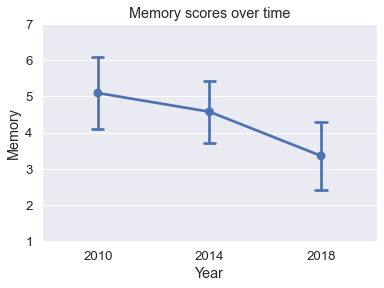

In [ ]:
sns.set(context='notebook', font_scale=1.2)
sns.pointplot(data=df, x='Year', y='Memory', capsize=.1, ci='sd')
plt.ylim(1, 7)
_ = plt.title('Memory scores over time')

### Run the ANOVA

To run a repeated-measures ANOVA in pingouin, the following arguments MUST be specified:

- data : the pandas DataFrame (in long-format or wide-format)
- dv : the dependent variable (only if data is in long-format)
- within : the within-subject factor (only if data is in long-format)
- subject : the subject identifier (only if data is in long-format)

In the example below, we are going to test if the means of the memory scores have changed across the three time points:

In [ ]:
pg.rm_anova(data=df, dv='Memory', within='Year', subject='Subject')

Source  ddof1  ddof2       F      p-unc    np2    eps
0   Year      2     38  17.365  4.398e-06  0.478  0.988

From the example above, it is clear that the means of the three time points are significantly different (F(2, 38)=23.9, p=1.89e-07). We can now further test the pairwise differences between each measurements using the [pairwise_ttests](https://pingouin-stats.org/generated/pingouin.pairwise_ttests.html#pingouin.pairwise_ttests) function:

In [ ]:
# Holm-corrected pairwise T-tests
pg.pairwise_ttests(data=df, dv='Memory', within='Year', subject='Subject', return_desc=True, padjust='holm')

Contrast     A     B  mean(A)  std(A)  mean(B)  std(B)  Paired  Parametric  \
0     Year  2010  2014    5.092   1.006    4.575   0.876    True        True   
1     Year  2010  2018    5.092   1.006    3.357   0.953    True        True   
2     Year  2014  2018    4.575   0.876    3.357   0.953    True        True   

       T   dof       Tail      p-unc     p-corr p-adjust      BF10  hedges  
0  1.629  19.0  two-sided  1.197e-01  1.197e-01     holm     0.717   0.537  
1  5.762  19.0  two-sided  1.494e-05  4.481e-05     holm  1532.361   1.736  
2  4.228  19.0  two-sided  4.549e-04  9.099e-04     holm    72.806   1.305

#### A note on sphericity

The repeated measures ANOVA table is very similar to the one-way ANOVA table, with an additional `eps` column. This refers to the epsilon statistic, which indicates the degree to which sphericity is present or not. An epsilon of 1 means that the condition of sphericity is exactly met. The further epsilon decreases below 1, the greater the violation of sphericity. In the example above, the condition of sphericity is almost exactly met. 

Another way to understand sphericity is to look at the covariance matrix of our data. If the variances of each measurements (i.e. elements on the diagonal of the covariance matrix) are roughly equal AND the covariances between measurements (i.e the off-diagonal elements) are also roughly equal, then we can be pretty confident that the assumption of sphericity is met (this is called *compound symmetry*, which is slightly different and more conservative than sphericity, the latter being that the variances between the pairwise *differences* are equals ; for more details on this, see [here](http://homepages.gold.ac.uk/aphome/spheric.html)).

To compute the covariance matrix, we first need to pivot our data from long-format to repeated measures format, i.e. one column per each repeated measurements.

In [ ]:
# Pivot the data
pivot = df.pivot(index='Subject', columns='Year', values='Memory')
pivot.head().round(3)

Year      2010   2014   2018
Subject                     
0        4.131  5.390  2.356
1        5.798  5.993  1.618
2        5.226  4.051  2.687
3        3.795  5.741  3.459
4        4.537  3.797  3.271

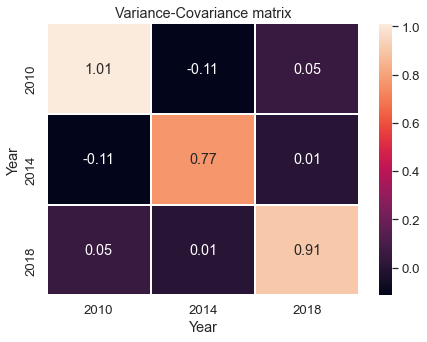

In [ ]:
# Plot the variance-covariance matrix
plt.figure(figsize=(7, 5))
ax = sns.heatmap(pivot.cov(), annot=True, fmt='.2f', linewidths=1)
_ = plt.title('Variance-Covariance matrix')

#### What if sphericity is not met?

When you are doing a repeated measures ANOVA, Pingouin automatically tests if the sphericity assumption is met using the [sphericity](https://pingouin-stats.org/generated/pingouin.sphericity.html#pingouin.sphericity) function, which is based on the [Mauchly test](https://en.wikipedia.org/wiki/Mauchly%27s_sphericity_test).

If the sphericity assumption is not met, Pingouin returns the Mauchly test chi-square statistic and p-values, as well as the Greenhouse-Geisser corrected p-value of the ANOVA (The Greenhouse-Geisser correction uses epsilon to correct the degrees of freedom of the ANOVA).

You can force the correction using `correction=True`:

In [ ]:
pg.rm_anova(data=df, dv='Memory', within='Year', subject='Subject', correction=True)

Source  ddof1  ddof2       F      p-unc  p-GG-corr    np2    eps  \
0   Year      2     38  17.365  4.398e-06  4.932e-06  0.478  0.988   

   sphericity  W-spher  p-spher  
0        True    0.988    0.895

Another alternative when the sphericity assumption is not met is to use a **one-sample Hotelling T-squared test** (see more [here](http://www.real-statistics.com/multivariate-statistics/multivariate-repeated-measures-tests/one-factor-multivariate-repeated-measures/)) on the differences.

To illustrate this, we'll load a repeated measures ANOVA dataset in wide-format:

In [ ]:
data_wide = pg.read_dataset('rm_anova_wide')
data_wide

Before  1 week  2 week  3 week
0      4.3     5.3     4.8     6.3
1      3.9     2.3     5.6     4.3
2      4.5     2.6     4.1     NaN
3      5.1     4.2     6.0     6.3
4      3.8     3.6     4.8     6.8
5      3.8     5.4     5.1     6.3
6      5.1     3.7     NaN     NaN
7      4.5     3.0     7.7     5.8
8      3.7     7.1     5.5     4.8
9      4.4     4.7     4.2     5.5
10     NaN     5.1     6.5     5.7
11     3.7     3.0     4.0     7.1

Let's now compute the difference between successive columns:

In [ ]:
data_wide_diff = data_wide.diff(axis=1).dropna(how='all', axis=1)
data_wide_diff.head()

1 week  2 week  3 week
0     1.0    -0.5     1.5
1    -1.6     3.3    -1.3
2    -1.9     1.5     NaN
3    -0.9     1.8     0.3
4    -0.2     1.2     2.0

And now let's compute the one-sample Hotelling T-squared test

In [ ]:
pg.multivariate_ttest(data_wide_diff)

T2       F  df1  df2   pval
hotelling  60.143  15.036    3    6  0.003

The results are consistent with a classic one-way repeated measures ANOVA. As one can see below, the p-value of the Hotelling T-squared is roughly located between the uncorrected p-value and the Greenhouse-Geisser p-value. The advantage of the Hotelling T-squared is that it doesn't require the sphericity assumption.

In [ ]:
pg.rm_anova(data_wide, correction=True)

Source  ddof1  ddof2      F  p-unc  p-GG-corr    np2    eps  sphericity  \
0  Within      3     24  5.201  0.007      0.017  0.394  0.694        True   

   W-spher  p-spher  
0    0.307    0.163

***

## Mixed ANOVA

In some cases, you might want to take the interation between a within-subject factor (e.g. time) and a between-subject factor (e.g. Group). This is done using a mixed two-way ANOVA.

We are first going to add a group factor to our previously created memory dataset.

In [ ]:
df['Sex'] = np.tile(np.repeat(['Men', 'Women'], 10), 3)
df.head()

Memory  Year  Subject  Sex
0   4.131  2010        0  Men
1   5.798  2010        1  Men
2   5.226  2010        2  Men
3   3.795  2010        3  Men
4   4.537  2010        4  Men

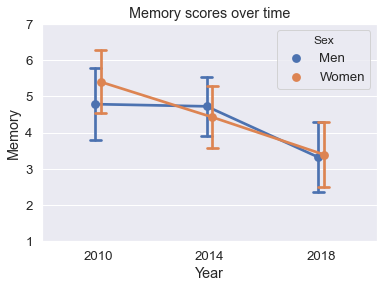

In [ ]:
sns.pointplot(data=df, x='Year', y='Memory', hue='Sex', dodge=True, capsize=.1, ci='sd')
plt.ylim(1, 7)
_ = plt.title('Memory scores over time')

In [ ]:
pg.mixed_anova(data=df, dv='Memory', between='Sex', within='Year', subject='Subject')

Source      SS  DF1  DF2      MS       F      p-unc    np2    eps
0          Sex   0.253    1   18   0.253   0.283  6.010e-01  0.016    NaN
1         Year  31.733    2   36  15.866  17.514  4.873e-06  0.493  0.988
2  Interaction   2.106    2   36   1.053   1.162  3.242e-01  0.061    NaN

In [ ]:
# Same but we want a generalized eta-squared ('ng2') instead of the default partial eta-squared ('np2')
pg.mixed_anova(data=df, dv='Memory', between='Sex', within='Year', subject='Subject', effsize='ng2')

Source      SS  DF1  DF2      MS       F      p-unc    ng2    eps
0          Sex   0.253    1   18   0.253   0.283  6.010e-01  0.005    NaN
1         Year  31.733    2   36  15.866  17.514  4.873e-06  0.395  0.988
2  Interaction   2.106    2   36   1.053   1.162  3.242e-01  0.041    NaN

Having calculated the ANOVA, we can now run pairwise T-tests. By default, Pingouin will calculate the within * between interaction (in this case, year * sex).

In [ ]:
pg.pairwise_ttests(data=df, dv='Memory', between='Sex', within='Year', subject='Subject')

Contrast  Year     A      B Paired  Parametric      T   dof       Tail  \
0        Year     -  2010   2014   True        True  1.629  19.0  two-sided   
1        Year     -  2010   2018   True        True  5.762  19.0  two-sided   
2        Year     -  2014   2018   True        True  4.228  19.0  two-sided   
3         Sex     -   Men  Women  False        True -0.532  18.0  two-sided   
4  Year * Sex  2010   Men  Women  False        True -1.399  18.0  two-sided   
5  Year * Sex  2014   Men  Women  False        True  0.753  18.0  two-sided   
6  Year * Sex  2018   Men  Women  False        True -0.169  18.0  two-sided   

       p-unc      BF10  hedges  
0  1.197e-01     0.717   0.537  
1  1.494e-05  1532.361   1.736  
2  4.549e-04    72.806   1.305  
3  6.010e-01     0.439  -0.228  
4  1.787e-01     0.779  -0.599  
5  4.613e-01     0.485   0.322  
6  8.677e-01     0.401  -0.072

To get the between * within interaction, one can use the `within_first` argument:

In [ ]:
pg.pairwise_ttests(data=df, dv='Memory', between='Sex', within='Year', subject='Subject', within_first=False)

Contrast    Sex     A      B Paired  Parametric      T   dof       Tail  \
0         Sex      -   Men  Women  False        True -0.532  18.0  two-sided   
1        Year      -  2010   2014   True        True  1.629  19.0  two-sided   
2        Year      -  2010   2018   True        True  5.762  19.0  two-sided   
3        Year      -  2014   2018   True        True  4.228  19.0  two-sided   
4  Sex * Year    Men  2010   2014   True        True  0.127   9.0  two-sided   
5  Sex * Year    Men  2010   2018   True        True  2.587   9.0  two-sided   
6  Sex * Year    Men  2014   2018   True        True  3.024   9.0  two-sided   
7  Sex * Year  Women  2010   2014   True        True  2.493   9.0  two-sided   
8  Sex * Year  Women  2010   2018   True        True  9.348   9.0  two-sided   
9  Sex * Year  Women  2014   2018   True        True  2.896   9.0  two-sided   

       p-unc      BF10  hedges  
0  6.010e-01     0.439  -0.228  
1  1.197e-01     0.717   0.537  
2  1.494e-05  1532.361   1.736  
3  4.549e-04    72.806   1.305  
4  9.020e-01     0.311   0.060  
5  2.936e-02      2.65   1.363  
6  1.440e-02     4.636   1.426  
7  3.426e-02     2.352   1.022  
8  6.253e-06  3111.139   2.069  
9  1.772e-02     3.934   1.071

***

## Missing values in repeated measures

### Long-format data

To deal with missing values in long-format dataframe with repeated measures, Pingouin implements the `remove_rm_na` function, which will automatically remove the missing values in specified within-subject factors. To illustrate this, let's load an example dataset

In [ ]:
df_missing = pg.read_dataset('rm_missing')
df_missing.head(12)

Study  Subj Gender Session     Time  Memory  BOLD  Mood  \
0   Pilot     1      M     Pre  Evening     4.0   2.0   NaN   
1   Pilot     1      M     Pre  Morning     7.0   NaN   NaN   
2   Pilot     1      M    Post  Evening     4.0   7.0   NaN   
3   Pilot     1      M    Post  Morning     5.0   NaN   NaN   
4   Pilot     2      M     Pre  Evening     5.0   6.0   3.0   
5   Pilot     2      M     Pre  Morning     1.0   9.0   9.0   
6   Pilot     2      M    Post  Evening     5.0  10.0   8.0   
7   Pilot     2      M    Post  Morning     6.0   5.0   3.0   
8   Pilot     3      F     Pre  Evening     NaN  10.0   6.0   
9   Pilot     3      F     Pre  Morning     2.0   6.0   5.0   
10  Pilot     3      F    Post  Evening     NaN   3.0   2.0   
11  Pilot     3      F    Post  Morning     1.0   6.0  10.0   

                   File  
0    S1_pre_evening.csv  
1    S1_pre_morning.csv  
2   S1_post_evening.csv  
3   S1_post_morning.csv  
4    S2_pre_evening.csv  
5    S2_pre_morning.csv  
6   S2_post_evening.csv  
7   S2_post_morning.csv  
8    S3_pre_evening.csv  
9    S3_pre_morning.csv  
10  S3_post_evening.csv  
11  S3_post_morning.csv

In [ ]:
# Let's remove the missing rows in the "Time" factor, based on the values in "Memory"
# The order of within matters: missing values are removed on the last factor
pg.remove_rm_na(data=df_missing, dv='Memory', subject='Subj', within=['Session', 'Time'])

Study  Subj Gender Session     Time  Memory  BOLD  Mood  \
0   Pilot     1      M    Post  Evening     4.0   7.0   NaN   
1   Pilot     1      M    Post  Morning     5.0   NaN   NaN   
2   Pilot     1      M     Pre  Evening     4.0   2.0   NaN   
3   Pilot     1      M     Pre  Morning     7.0   NaN   NaN   
4   Pilot     2      M    Post  Evening     5.0  10.0   8.0   
5   Pilot     2      M    Post  Morning     6.0   5.0   3.0   
6   Pilot     2      M     Pre  Evening     5.0   6.0   3.0   
7   Pilot     2      M     Pre  Morning     1.0   9.0   9.0   
8   Pilot     4      F    Post  Evening     8.0   8.0   5.0   
9   Pilot     4      F    Post  Morning     2.0   7.0   3.0   
10  Pilot     4      F     Pre  Evening     8.0   2.0   2.0   
11  Pilot     4      F     Pre  Morning     4.0   2.0   0.0   
12  Pilot     5      F    Post  Evening     9.0  10.0   8.0   
13  Pilot     5      F    Post  Morning     3.0   6.0   7.0   
14  Pilot     6      F     Pre  Evening     9.0   7.0  10.0   
15  Pilot     6      F     Pre  Morning     6.0   3.0   7.0   
16  Pilot     7      M    Post  Evening     7.0  10.0   6.0   
17  Pilot     7      M    Post  Morning     5.0   6.0   2.0   
18  Pilot     7      M     Pre  Evening     5.0   3.0   8.0   
19  Pilot     7      M     Pre  Morning     8.0   5.0   4.0   
20  Pilot     8      M    Post  Evening     5.0   1.0   3.0   
21  Pilot     8      M    Post  Morning     4.0   0.0   0.0   
22  Pilot     8      M     Pre  Evening     6.0   NaN   6.0   
23  Pilot     8      M     Pre  Morning     7.0   NaN   9.0   

                   File  
0   S1_post_evening.csv  
1   S1_post_morning.csv  
2    S1_pre_evening.csv  
3    S1_pre_morning.csv  
4   S2_post_evening.csv  
5   S2_post_morning.csv  
6    S2_pre_evening.csv  
7    S2_pre_morning.csv  
8   S4_post_evening.csv  
9   S4_post_morning.csv  
10   S4_pre_evening.csv  
11   S4_pre_morning.csv  
12  S5_post_evening.csv  
13  S5_post_morning.csv  
14   S6_pre_evening.csv  
15   S6_pre_morning.csv  
16  S7_post_evening.csv  
17  S7_post_morning.csv  
18   S7_pre_evening.csv  
19   S7_pre_morning.csv  
20  S8_post_evening.csv  
21  S8_post_morning.csv  
22   S8_pre_evening.csv  
23   S8_pre_morning.csv

In [ ]:
# If we do not specifiy a specific dv, missing values are taken from all the numeric columns
pg.remove_rm_na(data=df_missing, subject='Subj', within=['Session', 'Time'])

Study  Subj Gender Session     Time  Memory  BOLD  Mood  \
0   Pilot     2      M    Post  Evening     5.0  10.0   8.0   
1   Pilot     2      M    Post  Morning     6.0   5.0   3.0   
2   Pilot     2      M     Pre  Evening     5.0   6.0   3.0   
3   Pilot     2      M     Pre  Morning     1.0   9.0   9.0   
4   Pilot     4      F    Post  Evening     8.0   8.0   5.0   
5   Pilot     4      F    Post  Morning     2.0   7.0   3.0   
6   Pilot     4      F     Pre  Evening     8.0   2.0   2.0   
7   Pilot     4      F     Pre  Morning     4.0   2.0   0.0   
8   Pilot     5      F    Post  Evening     9.0  10.0   8.0   
9   Pilot     5      F    Post  Morning     3.0   6.0   7.0   
10  Pilot     6      F     Pre  Evening     9.0   7.0  10.0   
11  Pilot     6      F     Pre  Morning     6.0   3.0   7.0   
12  Pilot     7      M    Post  Evening     7.0  10.0   6.0   
13  Pilot     7      M    Post  Morning     5.0   6.0   2.0   
14  Pilot     7      M     Pre  Evening     5.0   3.0   8.0   
15  Pilot     7      M     Pre  Morning     8.0   5.0   4.0   
16  Pilot     8      M    Post  Evening     5.0   1.0   3.0   
17  Pilot     8      M    Post  Morning     4.0   0.0   0.0   

                   File  
0   S2_post_evening.csv  
1   S2_post_morning.csv  
2    S2_pre_evening.csv  
3    S2_pre_morning.csv  
4   S4_post_evening.csv  
5   S4_post_morning.csv  
6    S4_pre_evening.csv  
7    S4_pre_morning.csv  
8   S5_post_evening.csv  
9   S5_post_morning.csv  
10   S6_pre_evening.csv  
11   S6_pre_morning.csv  
12  S7_post_evening.csv  
13  S7_post_morning.csv  
14   S7_pre_evening.csv  
15   S7_pre_morning.csv  
16  S8_post_evening.csv  
17  S8_post_morning.csv

In [ ]:
# Finally, if there are more within-subject factors in the data than specified in `within`, 
# values are first aggregated. The default is to use the mean. In that case, all the non-numeric columns are discarded:
pg.remove_rm_na(data=df_missing, subject='Subj', within='Session', aggregate='mean')

Subj Session  Memory  BOLD  Mood
0     2    Post     5.5   7.5   5.5
1     2     Pre     3.0   7.5   6.0
2     3    Post     1.0   4.5   6.0
3     3     Pre     2.0   8.0   5.5
4     4    Post     5.0   7.5   4.0
5     4     Pre     6.0   2.0   1.0
6     6    Post     7.0   3.5   4.0
7     6     Pre     7.5   5.0   8.5
8     7    Post     6.0   8.0   4.0
9     7     Pre     6.5   4.0   6.0

### Wide-format data

To remove missing values in wide-format dataframe, one can simply use the [Pandas dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) function:

In [ ]:
data_wide

Before  1 week  2 week  3 week
0      4.3     5.3     4.8     6.3
1      3.9     2.3     5.6     4.3
2      4.5     2.6     4.1     NaN
3      5.1     4.2     6.0     6.3
4      3.8     3.6     4.8     6.8
5      3.8     5.4     5.1     6.3
6      5.1     3.7     NaN     NaN
7      4.5     3.0     7.7     5.8
8      3.7     7.1     5.5     4.8
9      4.4     4.7     4.2     5.5
10     NaN     5.1     6.5     5.7
11     3.7     3.0     4.0     7.1

In [ ]:
data_wide.dropna()  # Remove rows with NaN

Before  1 week  2 week  3 week
0      4.3     5.3     4.8     6.3
1      3.9     2.3     5.6     4.3
3      5.1     4.2     6.0     6.3
4      3.8     3.6     4.8     6.8
5      3.8     5.4     5.1     6.3
7      4.5     3.0     7.7     5.8
8      3.7     7.1     5.5     4.8
9      4.4     4.7     4.2     5.5
11     3.7     3.0     4.0     7.1

In [ ]:
data_wide.dropna(axis=1)  # Remove columns with NaN

1 week
0      5.3
1      2.3
2      2.6
3      4.2
4      3.6
5      5.4
6      3.7
7      3.0
8      7.1
9      4.7
10     5.1
11     3.0